* # El conjunto de datos de IMDB contiene información sobre un poco mas de 10,000 películas, incluidos sus nombres, fechas de lanzamiento, calificaciones de usuarios, géneros, descripciones generales, miembros del elenco y del equipo, títulos originales, estado de producción, idiomas originales, presupuestos, ingresos y países de origen.
    * ## Haremos un análisis en general para poder identificar tendencias en géneros cinematograficos, buscar relaciones que tengan entre los presupuestos de peliculas y predecir el ingreso o el exito que podria tener alguna pelicula a futuro

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("./movies_imdb.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [3]:
#### Como siempre hacemos, cambiaremos los nombres de la columna a castellano asi es mas legible.
data = data.rename(columns={"names":"nombre","date_x":"fecha_lanzamiento","score":"opiniones_usuarios",
                            "genre":"genero","overview":"vision_general","crew":"reparto","orig_title":"titulo_original",
                           "status":"estado_lanzamiento","orig_lang":"idioma_original","budget_x":"presupuesto",
                           "revenue":"ganancia","country":"pais"})

In [4]:
data.head()

,nombre,fecha_lanzamiento,opiniones_usuarios,genero,vision_general,reparto,titulo_original,estado_lanzamiento,idioma_original,presupuesto,ganancia,pais
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


**Observación**
* Lo que podemos ver es que solamente tenemos 3 columnas con valore numericos, las demas son variables.
----

In [5]:
data.describe()

,opiniones_usuarios,presupuesto,ganancia
count,10178.000000,1.017800e+04,1.017800e+04
mean,63.497052,6.488238e+07,2.531401e+08
std,13.537012,5.707565e+07,2.777880e+08
min,0.000000,1.000000e+00,0.000000e+00
25%,59.000000,1.500000e+07,2.858898e+07
50%,65.000000,5.000000e+07,1.529349e+08
75%,71.000000,1.050000e+08,4.178021e+08
max,100.000000,4.600000e+08,2.923706e+09


**Observación**
* **OPINIONES DE USUARIOS**:
    * la media es de 63.49
    * la STD = 13.53
* **PRESUPUESTO**:
    * Media = 6.488238e+07
    * STD = 5.707565e+07
* **GANANCIAS**:
    * Media de ganancias = 2.531401e+08
    * STD sobre las ganancias = 2.777880e+08

    
    
* **STD:** La desviación estándar es la medida de dispersión más común, que indica qué tan dispersos están los datos alrededor de la media. Es decir que dicho valor tiende a desviarse de la media tanto hacia arriba y abajo.

In [6]:
#### Buscamos si contiene valores nulos el data set.
data.isna().sum()

nombre                 0
fecha_lanzamiento      0
opiniones_usuarios     0
genero                85
vision_general         0
reparto               56
titulo_original        0
estado_lanzamiento     0
idioma_original        0
presupuesto            0
ganancia               0
pais                   0
dtype: int64

* Podemos ver que de las 10177 películas, No tenemos datos sobre el genero en 85 películas y el reparto en otras 56. 

In [7]:
#### DUMIFICAREMOS TODAS LAS VARIABLES QUE NO SEAN NUMERICAS.

fecha_dummy = pd.get_dummies(data["fecha_lanzamiento"])
genero_dummy = pd.get_dummies(data["genero"])
idioma_dummy = pd.get_dummies(data["idioma_original"])
pais_dummy = pd.get_dummies(data["pais"])

**No dumificamos las variables "vision general y reparto" por que nos crearia 10177 columnas (es decir que todos tienen un reparto diferentes y vision general ESCRITA diferente) aun que sean las mas importantes para poder predecir que tan buena es una pelicula o no**

-----

In [8]:
data.columns.values

array(['nombre', 'fecha_lanzamiento', 'opiniones_usuarios', 'genero',
       'vision_general', 'reparto', 'titulo_original',
       'estado_lanzamiento', 'idioma_original', 'presupuesto', 'ganancia',
       'pais'], dtype=object)

* ### Estos son algunos datos importantes a tener en cuenta, Queria hacer una grafica pero contiene muchas columnas.


* **PAISES CON MAS PELÍCULAS CREADAS:**
    * AU = 4885 
    * US = 2705
    * JP = 538
    * KR = 361
* **CONTEO DE IDIOMAS:**
    * Ingles = 7417
    * Japones = 714
    * Español = 397
    * Koreano = 388 
----
---

* # Analísis sobre los generos mas importantes o repetidos en dichas peliculas.
# GRAFICA

In [9]:
suma_generos = genero_dummy.iloc[:,15:].sum()
top_15_generos = suma_generos.nlargest(15)

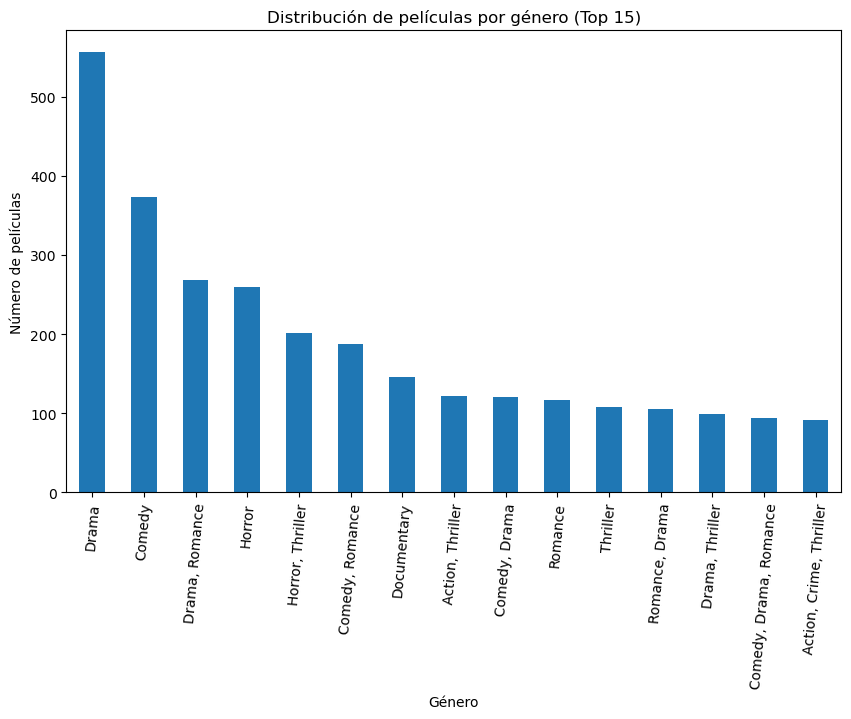

In [10]:
plt.figure(figsize=(10, 6))
top_15_generos.plot(kind='bar')
plt.xlabel('Género')
plt.ylabel('Número de películas')
plt.title('Distribución de películas por género (Top 15)')
plt.xticks(rotation=85)
plt.show()

In [11]:
import seaborn as sns

C:\Users\Acer\AppData\Local\Temp\ipykernel_13524\1785325799.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion= data.corr()


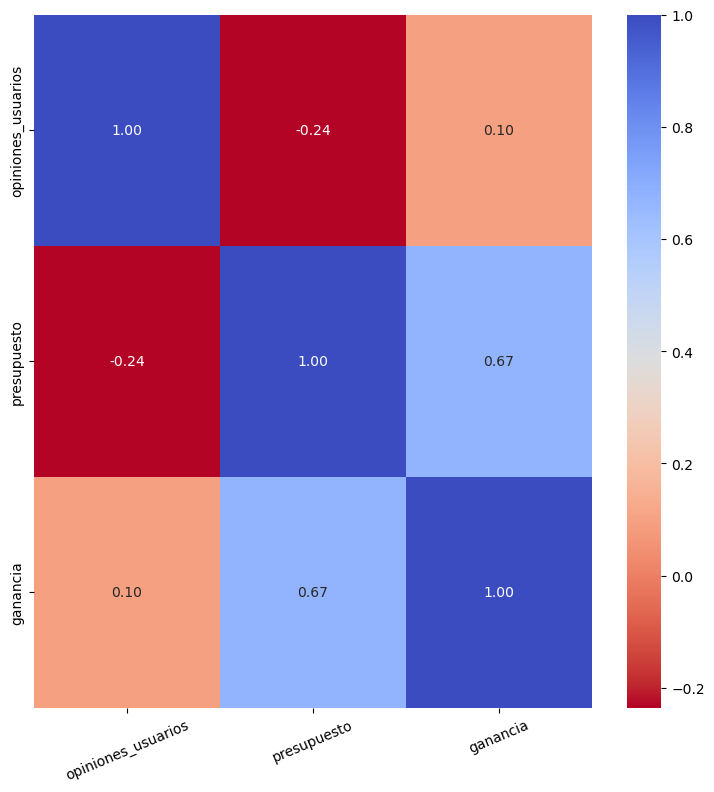

In [12]:
correlacion= data.corr()
plt.figure(figsize=(9,9))
sns.heatmap(correlacion , annot=True , fmt ='.2f',
            cmap=plt.cm.coolwarm_r)
plt.xticks(rotation=23)
plt.show()

* # La correlación que tienen positiva mas alta son:
    * ### GANANCIA Y PRESUPUESTO = 0.67 
    * ### Luego PRESUPUESTO Y GANANCIA = 0.24
    * ### AÑO LANZAMIENTO Y GANANCIA = 0.15 
----

In [13]:
data["fecha_lanzamiento"] = pd.to_datetime(data["fecha_lanzamiento"])

In [14]:
data["año_lanzamiento"] = data["fecha_lanzamiento"].dt.year

In [15]:
peliculas_años = data["año_lanzamiento"].value_counts().sort_index()

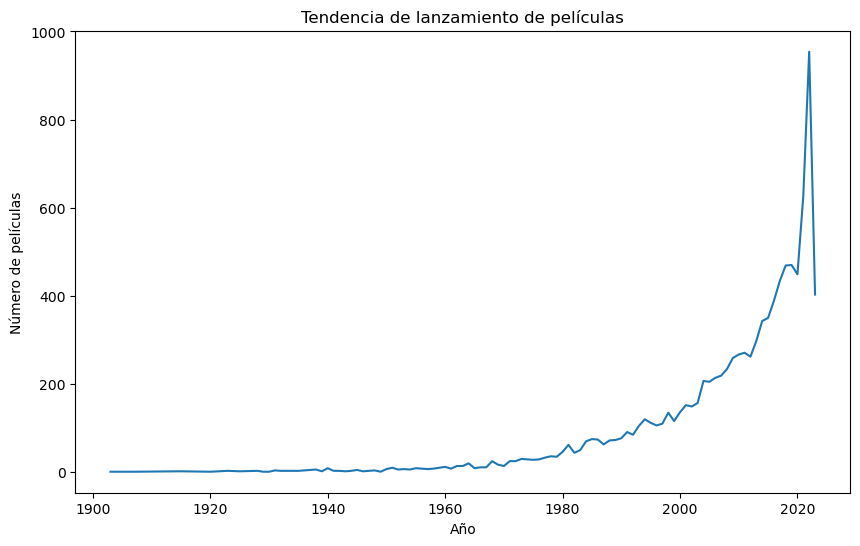

In [16]:
peliculas_años.plot(kind='line', figsize=(10, 6))
plt.xlabel('Año')
plt.ylabel('Número de películas')
plt.title('Tendencia de lanzamiento de películas')
plt.show()

* #### Este es un gráfico de líneas que muestra cómo ha evolucionado el número de películas lanzadas a lo largo de los años. Segun el conjunto de datos sobre peliculas de IMDB.

-----------


-----------------------------------------------------
-
# PREDICCIÓN - OPINIONES DE LOS USUARIOS 
   * ### Predecir que opinion tendrian los usuarios si la película tiene en especifico un idioma, país origen, genero, presupuesto y fecha de lanzamiento (tambien entraria la ganancia, que es la variable a predecir en otro modelo que haremos. pero eso ya se sabria si es para plataforma de streaming o también para ver que ganancia tendria una pelicula a futuro).

---

* # REGRESIÓN LINEAL SOLO VARIABLES NUMERICAS (opiniones de usuarios sobre las películas ).

In [19]:
from sklearn.linear_model import LinearRegression

In [237]:
x = data[["ganancia","presupuesto","año_lanzamiento"]]
y = data[["opiniones_usuarios"]]

In [21]:
lm1 = LinearRegression()
lm1.fit(X,y)

LinearRegression()

In [24]:
lm1.intercept_ , lm1.coef_

(array([224.92418378]),
 array([[ 2.26966403e-08, -1.25221534e-07, -7.92092598e-02]]))

In [25]:
lm1.score(X,y)*100

18.231192585688127

* ## EN LA REGRESIÓN LINEAL SOBRE LAS OPINIONES DE USUARIOS Obtenemos un resultado del %18.23 (Es un resultado muy bajo obviamente, seguimos tentiendo las pocas variables numericas por que son las unicas variables numericas que tenemos sin dumificar las demas).
---

---

* # REGRESIÓN LINEAL TODAS LAS VARIABLES (opiniones de usuarios sobre las películas).

In [26]:
#### Concatenamos las variables dumificadas con las numericas que ya teniamos
data_pred_opinion = pd.concat([X,genero_dummy,idioma_dummy,pais_dummy], axis=1)
data_pred_opinion.head()

,ganancia,presupuesto,año_lanzamiento,Action,"Action, Adventure","Action, Adventure, Animation","Action, Adventure, Animation, Comedy","Action, Adventure, Animation, Comedy, Family","Action, Adventure, Animation, Comedy, Family, Science Fiction","Action, Adventure, Animation, Comedy, Romance, Family",...,SU,TH,TR,TW,UA,US,UY,VN,XC,ZA
0,2.716167e+08,75000000.0,2023,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.316795e+09,460000000.0,2022,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.244590e+08,100000000.0,2023,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.420000e+07,12300000.0,2023,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.409420e+08,77000000.0,2023,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


**Observacíon**
* Tenemos 2420 columnas despues de dumificarlas.
----

In [286]:
lm2 = LinearRegression()
lm2.fit(data_pred_opinion,y)

LinearRegression()

In [287]:
lm2.score(data_pred_opinion,y)

0.513004953013115

* ## Obtenemos un resultado del %51.30 con la regresion lineal y todas las variables dumificadas. Evidentemente tiene una mejoria con el modelo anterior que solo contenia las variables numericas que era del %18.23
----

---
* # REGRESIÓN LINEAL (con datos de entrenamiento y test)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data_pred_opinion, y, test_size=0.3, random_state=42)

In [36]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
y_pred = model.predict(X_test)
print("Precisión del modelo:", accuracy_score(y_test, y_pred)*100)

Precisión del modelo: 4.518664047151278


* ## Modelo muy negativo con los datos de entrenamiento y test, solamente un %4.51 de efectividad sobre el modelo
---

----
* # RANDOM FOREST - opiniones de los usuarios 

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error

In [42]:
random_forest = RandomForestRegressor(min_samples_split=120 , min_samples_leaf=450 , n_estimators=350 ,  random_state=42,
                                     max_depth=4 , n_jobs=2 , oob_score=True)
random_forest.fit(X,y)

C:\Users\Acer\AppData\Local\Temp\ipykernel_13524\1727326830.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X,y)


RandomForestRegressor(max_depth=4, min_samples_leaf=450, min_samples_split=120,
                      n_estimators=350, n_jobs=2, oob_score=True,
                      random_state=42)

In [43]:
Y_pred = random_forest.predict(X)
mse1 = mean_squared_error(y , Y_pred)
mae1 = mean_absolute_error(y , Y_pred)
R2 = r2_score(y, Y_pred)

print("MSE:",mse1)
print("MAE:", mae1)
print("R2",R2)

MSE: 162.31085908335018
MAE: 8.758881814898329
R2 0.11418180341768547


* ### Resultado bastante malo para el RANDOM FOREST, haremos igual el de modo de test y entrenamiento para ver como se comportan.
----

In [44]:
#Separamos en variables de entrenamiento y test (con un 30% para hacer el test)
X_train, X_test , Y_train, Y_test = train_test_split(data_pred_opinion,y , test_size=0.3 , random_state=42)

In [45]:
random_forest = RandomForestRegressor(min_samples_split=120 , min_samples_leaf=450 , n_estimators=350 ,  random_state=42,
                                     max_depth=4 , n_jobs=2 , oob_score=True)
random_forest.fit(X_train,Y_train)

C:\Users\Acer\AppData\Local\Temp\ipykernel_13524\2213422508.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,Y_train)


RandomForestRegressor(max_depth=4, min_samples_leaf=450, min_samples_split=120,
                      n_estimators=350, n_jobs=2, oob_score=True,
                      random_state=42)

In [46]:
Y_pred = random_forest.predict(X_test)
mse1 = mean_squared_error(Y_test , Y_pred)
mae1 = mean_absolute_error(Y_test , Y_pred)
R2 = r2_score(Y_test, Y_pred)

print("MSE:",mse1)
print("MAE:", mae1)
print("R2",R2)

MSE: 157.02844696403386
MAE: 8.676220516610588
R2 0.08006945634225482


* ## En resumen sobre el RANDOM FOREST, basándonos en las métricas que proporciona el modelo, el rendimiento del modelo de Random Forest no parece ser muy bueno. El MSE y el MAE son relativamente altos, lo que indica que las predicciones del modelo tienen errores significativos en comparación con los valores reales. Además, el valor de R2 sugiere que el modelo tiene una capacidad limitada para explicar la variabilidad en los datos. NO es un buen modelo predictivo
----

-----
* # RED NEURONAL PARA OPINIONES DE USUARIO.

In [219]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow import keras

In [220]:
#### Separamos neuvamente en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(data_pred_opinion, y, test_size=0.3, random_state=42)

#### armamos el modelo
model = Sequential()
model.add(Dense(128, activation='relu' , input_shape=(X_train.shape[1],)))
model.add(Dense(64,activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1)) ### capa de salida para la Regresión

In [221]:
### Compilamos
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), loss='mean_squared_error')

In [222]:
#### ENTRENAMOS LA RED NEURONAL 
model.fit(X_train , y_train , epochs=100 , batch_size=34)

Epoch 1/100
210/210 [==============================] - 3s 10ms/step - loss: 1297160601600.0000
Epoch 2/100
210/210 [==============================] - 2s 12ms/step - loss: 116023803904.0000
Epoch 3/100
210/210 [==============================] - 2s 11ms/step - loss: 29828149248.0000
Epoch 4/100
210/210 [==============================] - 2s 8ms/step - loss: 16086404096.0000
Epoch 5/100
210/210 [==============================] - 2s 10ms/step - loss: 5745273344.0000
Epoch 6/100
210/210 [==============================] - 2s 10ms/step - loss: 4540047.0000
Epoch 7/100
210/210 [==============================] - 2s 8ms/step - loss: 458683328.0000
Epoch 8/100
210/210 [==============================] - 2s 9ms/step - loss: 4065.9312
Epoch 9/100
210/210 [==============================] - 2s 8ms/step - loss: 543503.6250
Epoch 10/100
210/210 [==============================] - 2s 7ms/step - loss: 32176.7070
Epoch 11/100
210/210 [==============================] - 2s 8ms/step - loss: 3375.6052
Epoch 12/1

In [223]:
###### rendimiento del modelo
loss = model.evaluate(X_test, y_test)

# Las predicciones
y_pred = model.predict(X_test)

96/96 [==============================] - 0s 3ms/step


In [224]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)

MSE: 170.84068807238407
MAE: 8.708833365949369
R2: -0.0008477450795152386


* ## Los resultados que obtuvimos con la red neuronal inicial son bastante pobres, lo cual indica que el modelo no está ajustándose adecuadamente a los datos. intentaremos de hacer una red mas compleja y ver si mejora, sino tomaremos la Regresion lineal y trataremos de mejorarla .
----

In [173]:
###### Datos de entrada
X = data_pred_opinion
y = data["opiniones_usuarios"]

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [174]:
# Construir el modelo de la red neuronal
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))

In [175]:
###### Compilar el modelo
model.compile(optimizer=keras.optimizers.Adamax(learning_rate=0.001), loss='mean_squared_error')

In [158]:
###### #### Entrenar la red neuronal
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
223/223 [==============================] - 3s 10ms/step - loss: 21189797871616.0000
Epoch 2/10
223/223 [==============================] - 2s 8ms/step - loss: 4463999844352.0000
Epoch 3/10
223/223 [==============================] - 2s 8ms/step - loss: 2447340732416.0000
Epoch 4/10
223/223 [==============================] - 2s 11ms/step - loss: 1643791122432.0000
Epoch 5/10
223/223 [==============================] - 2s 10ms/step - loss: 1260727042048.0000
Epoch 6/10
223/223 [==============================] - 2s 8ms/step - loss: 920248123392.0000
Epoch 7/10
223/223 [==============================] - 2s 9ms/step - loss: 711517667328.0000
Epoch 8/10
223/223 [==============================] - 2s 8ms/step - loss: 573388292096.0000
Epoch 9/10
223/223 [==============================] - 2s 9ms/step - loss: 439637803008.0000
Epoch 10/10
223/223 [==============================] - 2s 11ms/step - loss: 310507143168.0000


In [159]:
# Realizar predicciones
y_pred = model.predict(X_test)

96/96 [==============================] - 1s 4ms/step


In [160]:
# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas
print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)

MSE: 7399346175.097708
MAE: 61864.933405060234
R2: -43348097.26609669


* # Observación:
* ## para que no sea un trabajo muy extenso voy a ir probando disintos optimizadores y pondre los resultados del R2 que voy obteniendo .
    * ### Adagrad = -19.88 -.MALO
    * ### Adadelta = -20004 -.MALO
    * ### Nadam = -311 -.MALO
    * ### Ftrl = -23.75
    * ### RMSprop = -22.11
    * ### RMSprop2 = 0.00013
    
* ## Todos valores muy pobres y por debajo de las espectativas.

----

* # Intentaremos algunas mas con menos datos 

In [226]:
y = data[["opiniones_usuarios"]]

In [227]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#### armamos el modelo
model = Sequential()
model.add(Dense(128, activation='relu' , input_shape=(X_train.shape[1],)))
model.add(Dense(64,activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1)) ### capa de salida para la Regresión

In [228]:
### Compilamos
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), loss='mean_squared_error')

In [232]:
#### ENTRENAMOS LA RED NEURONAL 
model.fit(X_train , y_train , epochs=10 , batch_size=32)

Epoch 1/10
223/223 [==============================] - 1s 3ms/step - loss: 1025948057600.0000
Epoch 2/10
223/223 [==============================] - 1s 3ms/step - loss: 52632543232.0000
Epoch 3/10
223/223 [==============================] - 1s 3ms/step - loss: 3100910336.0000
Epoch 4/10
223/223 [==============================] - 1s 3ms/step - loss: 22103316.0000
Epoch 5/10
223/223 [==============================] - 1s 3ms/step - loss: 5908554.0000
Epoch 6/10
223/223 [==============================] - 1s 3ms/step - loss: 4101.3247
Epoch 7/10
223/223 [==============================] - 1s 5ms/step - loss: 66329.9922
Epoch 8/10
223/223 [==============================] - 1s 4ms/step - loss: 3793.2798
Epoch 9/10
223/223 [==============================] - 1s 5ms/step - loss: 3520.3259
Epoch 10/10
223/223 [==============================] - 1s 3ms/step - loss: 3163.4390


In [233]:
###### rendimiento del modelo
loss = model.evaluate(X_test, y_test)

# Las predicciones
y_pred = model.predict(X_test)

96/96 [==============================] - 0s 2ms/step


In [234]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)

MSE: 2973.1381508613404
MAE: 53.320936419718706
R2: -16.41773957758052


* # R2 = -16.41 .-resultado negativo
-----

In [267]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [268]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data_pred_opinion, y, test_size=0.2, random_state=42)

In [269]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [270]:
# Ajustar un modelo de regresión lineal con regularización Ridge
ridge = Ridge(alpha=0.5)  # Puedes ajustar el parámetro alpha según tus necesidades
ridge.fit(X_train_scaled, y_train)

# Evaluar el modelo en el conjunto de prueba
score = ridge.score(X_test_scaled, y_test)
print("Score:", score)

Score: -0.5456310703964304


* # R2 = -0.54 .-resultado negativo
-----

In [305]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [306]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [307]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Construir el modelo de Red Neuronal Artificial (ANN)
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [308]:
# Compilar el modelo
optimizer = Adam(learning_rate=0.0001)  # Puedes ajustar la tasa de aprendizaje según tus necesidades
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [309]:
# Entrenar el modelo
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32)

Epoch 1/50
223/223 [==============================] - 2s 5ms/step - loss: 4095.1016
Epoch 2/50
223/223 [==============================] - 1s 5ms/step - loss: 3165.3677
Epoch 3/50
223/223 [==============================] - 1s 4ms/step - loss: 1217.1637
Epoch 4/50
223/223 [==============================] - 1s 3ms/step - loss: 481.7885
Epoch 5/50
223/223 [==============================] - 1s 4ms/step - loss: 400.3384
Epoch 6/50
223/223 [==============================] - 1s 3ms/step - loss: 364.6103
Epoch 7/50
223/223 [==============================] - 1s 3ms/step - loss: 334.5680
Epoch 8/50
223/223 [==============================] - 1s 3ms/step - loss: 306.6027
Epoch 9/50
223/223 [==============================] - 1s 3ms/step - loss: 281.5520
Epoch 10/50
223/223 [==============================] - 1s 3ms/step - loss: 259.0200
Epoch 11/50
223/223 [==============================] - 1s 4ms/step - loss: 239.4318
Epoch 12/50
223/223 [==============================] - 1s 4ms/step - loss: 222.925

In [310]:
# Evaluar el modelo en el conjunto de prueba
score = model.evaluate(X_test_scaled, y_test)
print("Score:", score)

96/96 [==============================] - 0s 2ms/step - loss: 120.4163
Score: 120.416259765625


In [314]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Construir el modelo de Red Neuronal Artificial (ANN)
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

# Compilar el modelo
optimizer = Adam(learning_rate=0.0001)  # Ajusta la tasa de aprendizaje según tus necesidades
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train_scaled, y_train, epochs=500, batch_size=32)

Epoch 1/500
223/223 [==============================] - 2s 5ms/step - loss: 3927.7102
Epoch 2/500
223/223 [==============================] - 1s 5ms/step - loss: 788.8171
Epoch 3/500
223/223 [==============================] - 1s 5ms/step - loss: 399.1750
Epoch 4/500
223/223 [==============================] - 1s 5ms/step - loss: 336.9486
Epoch 5/500
223/223 [==============================] - 1s 6ms/step - loss: 284.9242
Epoch 6/500
223/223 [==============================] - 2s 7ms/step - loss: 244.0122
Epoch 7/500
223/223 [==============================] - 1s 6ms/step - loss: 211.9077
Epoch 8/500
223/223 [==============================] - 1s 6ms/step - loss: 188.6201
Epoch 9/500
223/223 [==============================] - 1s 6ms/step - loss: 171.4435
Epoch 10/500
223/223 [==============================] - 2s 7ms/step - loss: 159.1015
Epoch 11/500
223/223 [==============================] - 2s 7ms/step - loss: 150.1075
Epoch 12/500
223/223 [==============================] - 1s 6ms/step - los

223/223 [==============================] - 1s 5ms/step - loss: 97.7678
Epoch 194/500
223/223 [==============================] - 1s 5ms/step - loss: 97.5361
Epoch 195/500
223/223 [==============================] - 1s 4ms/step - loss: 97.8565
Epoch 196/500
223/223 [==============================] - 1s 4ms/step - loss: 97.4259
Epoch 197/500
223/223 [==============================] - 1s 4ms/step - loss: 97.8842
Epoch 198/500
223/223 [==============================] - 1s 4ms/step - loss: 97.7193
Epoch 199/500
223/223 [==============================] - 1s 5ms/step - loss: 97.9235
Epoch 200/500
223/223 [==============================] - 1s 5ms/step - loss: 97.2941
Epoch 201/500
223/223 [==============================] - 1s 5ms/step - loss: 97.9856
Epoch 202/500
223/223 [==============================] - 1s 5ms/step - loss: 97.8450
Epoch 203/500
223/223 [==============================] - 2s 8ms/step - loss: 97.4435
Epoch 204/500
223/223 [==============================] - 2s 8ms/step - loss: 97

223/223 [==============================] - 1s 6ms/step - loss: 94.2690
Epoch 386/500
223/223 [==============================] - 1s 5ms/step - loss: 94.7098
Epoch 387/500
223/223 [==============================] - 1s 6ms/step - loss: 94.4597
Epoch 388/500
223/223 [==============================] - 1s 5ms/step - loss: 94.0175
Epoch 389/500
223/223 [==============================] - 1s 5ms/step - loss: 93.9171
Epoch 390/500
223/223 [==============================] - 1s 5ms/step - loss: 94.1004
Epoch 391/500
223/223 [==============================] - 1s 5ms/step - loss: 94.3381
Epoch 392/500
223/223 [==============================] - 1s 6ms/step - loss: 94.1011
Epoch 393/500
223/223 [==============================] - 1s 6ms/step - loss: 94.4029
Epoch 394/500
223/223 [==============================] - 1s 6ms/step - loss: 95.2136
Epoch 395/500
223/223 [==============================] - 1s 5ms/step - loss: 94.5620
Epoch 396/500
223/223 [==============================] - 1s 5ms/step - loss: 94

In [315]:
# Evaluar el modelo en el conjunto de prueba
score = model.evaluate(X_test_scaled, y_test)
print("Score:", score)

96/96 [==============================] - 1s 3ms/step - loss: 102.8297
Score: 102.82968139648438


* # Nose quedaremos con el valor de la Regresion Lineal.  Al parecer la redes neuronales no es un buen modelo para esta clase de trabajo. sigue arrojando valores muy malos. 
----
* # Vamos a mejorar el modelo de la regresion lineal sobre las opiniones luego.

---
* # REGRESIÓN LINEAL. (para predecir las ganancia)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [58]:
X = data[["opiniones_usuarios","presupuesto","año_lanzamiento"]]
y = data[["ganancia"]]

In [59]:
lm = LinearRegression()
lm.fit(X,y)

LinearRegression()

In [60]:
lm.intercept_ , lm.coef_

(array([-8.7208281e+08]),
 array([[5.57301789e+06, 3.57361411e+00, 2.68676647e+05]]))

In [61]:
lm.score(X,y)*100

52.32013000823509

* ### EN LA REGRESIÓN LINEAL SOBRE LAS GANANCIAS Obtenemos un resultado del %53.32 (es algo bueno por las pocas variables numerica que tenemos en cuenta para el modelo).
----

* # Luego en estos dias seguirmos mejorando el modelo 